In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2

In [2]:
dataset="Train"

In [5]:
images=os.listdir("Train/Images/")
len(images)

304

In [6]:
train=pd.read_csv("Train/train.csv")

In [9]:
pokemon=train["NameOfPokemon"].unique()

array(['Pikachu', 'Bulbasaur', 'Charmander'], dtype=object)

In [22]:
dic={
    0:"Pikachu",
    1:"Bulbasaur",
    2:"Charmander"
}
reverse_dic={
    "Pikachu":0,
    "Bulbasaur":1,
    "Charmander":2
}

In [36]:
X=[]
Y=[]
im_path="Train/Images/"
for im in images:
    img=cv2.imread(im_path+im)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(100,100))
    X.append(img)
    lab=reverse_dic[list(train[train["ImageId"]==im]["NameOfPokemon"])[0]]
    Y.append(lab)
    
    
    

In [42]:
X=np.array(X)
Y=np.array(Y)

In [43]:
X.shape

(304, 100, 100, 3)

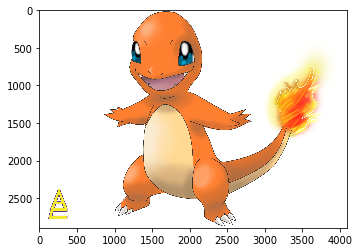

In [47]:
i=plt.imread(im_path+images[300])
plt.imshow(i)

In [75]:
train

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu
5,301.jpg,Pikachu
6,302.jpg,Pikachu
7,303.jpg,Pikachu
8,304.jpg,Pikachu
9,305.jpg,Pikachu


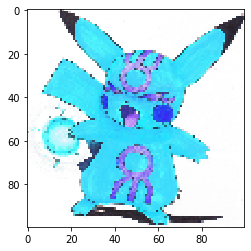

In [138]:
imgt=images[np.random.randint(304)]

testing=cv2.imread(im_path+imgt)
testing=cv2.resize(testing,(100,100))
plt.imshow(testing)

In [54]:
def dist(v1,v2):#point can be n dimension
    return np.sqrt(np.sum((v1-v2)**2))
def knn(X,Y,query_point,k=5):
    m=X.shape[0]
    distances=[]
    for i in range(m):
        distances.append((dist(query_point,X[i]),Y[i]))
        
    distances=sorted(distances)[:5]
    distances=np.array(distances)
    labels=distances[:,1]
    labels,freq=np.unique(labels,return_counts=True)
    pred=labels[freq.argmax()]
    
    return dic[pred]

In [139]:
knn(X,Y,testing)

'Pikachu'

In [140]:
list(train[train["ImageId"]==imgt]["NameOfPokemon"])[0]

'Pikachu'